In [9]:
"""
Load result log from local

There are three files, one for each of the three models.
1. results_GNN.txt: Results for GNN models (GCN, GAT, GraphSAGE, GIN)
2. restuls_KANGNN.txt: Results for KAN + GNN models
3. results_KAN.txt: Results for KAN models

Datasets are in the following order:
1. Cora
2. Citeseer
3. Pubmed
4. Cornell
5. Texas
6. Wisconsin
"""


def parse_config(config_string):
    config_dict = {}
    parts = config_string.split(", ")
    for part in parts:
        key, value = part.split(": ")
        if value.isdigit():
            config_dict[key] = int(value)
        elif value.lower() in ["true", "false"]:
            config_dict[key] = value.lower() == "true"
        elif "." in value:
            config_dict[key] = float(value)
        else:
            config_dict[key] = value
    return config_dict


# config_string = "Dataset name: Cora, Model name: KAN, Hidden size: 16, Num. KAN layers: 1, Input embed: True, lr: 0.1"
# config = parse_config(config_string)
# print(config)


def parse_results(result_string):
    result_dict = {}
    parts = result_string.split(", ")
    for part in parts:
        key, value = part.split(": ")
        result_dict[key] = float(value) if "." in value else int(value)
    return result_dict


# result_string = "Validation accuracy: 0.688192, Test accuracy: 0.714286, Num. parameters: 24048, Train time: 0.77, Best epoch: 13"
# results = parse_results(result_string)
# print(results)

result_GNN = {}

with open("results_GNN.txt", "r") as f:
    for line in f:
        if line.startswith("Dataset name:"):
            result_config = parse_config(line)
        elif line.startswith("Validation accuracy:"):
            result_dict = parse_results(line)

            dataset = result_config["Dataset name"]
            model = result_config["Model name"]
            hidden_size = result_config["Hidden size"]
            num_layers = result_config["Num. layers"]
            lr = result_config["lr"]

            if dataset not in result_GNN:
                result_GNN[dataset] = {}
            if model not in result_GNN[dataset]:
                result_GNN[dataset][model] = {}
            if hidden_size not in result_GNN[dataset][model]:
                result_GNN[dataset][model][hidden_size] = {}
            if num_layers not in result_GNN[dataset][model][hidden_size]:
                result_GNN[dataset][model][hidden_size][num_layers] = {}
            if lr not in result_GNN[dataset][model][hidden_size][num_layers]:
                result_GNN[dataset][model][hidden_size][num_layers][lr] = result_dict

In [10]:
def parse_config(config_string):
    config_dict = {}
    parts = config_string.split(", ")
    for part in parts:
        key, value = part.split(": ", 1)  # Only split at the first ': '
        if value.isdigit():
            config_dict[key] = int(value)
        elif value.lower() in ["true", "false"]:
            config_dict[key] = value.lower() == "true"
        elif "." in value:
            config_dict[key] = float(value)
        else:
            config_dict[key] = value
    return config_dict


def parse_results(result_string):
    result_dict = {}
    parts = result_string.split(", ")
    for part in parts:
        key, value = part.split(": ")  # Only split at the first ': '
        result_dict[key] = float(value) if "." in value else int(value)
    return result_dict


def parse_log(log):
    config_string, result_string = log.split("\n")  # Split the log by '\n'
    config = parse_config(config_string)
    results = parse_results(result_string)
    return config, results


result_KANGNN = {}

with open("results_KANGNN.txt", "r") as f:
    for line in f:
        if line.startswith("Dataset name:"):
            result_config = parse_config(line)
        elif line.startswith("Validation accuracy:"):
            result_dict = parse_results(line)

            dataset = result_config["Dataset name"]
            model = result_config["Model name"]
            hidden_size = result_config["Hidden size"]
            num_layers = result_config["Num. KAN layers"]
            num_MP_layers = result_config["MP layers"]
            input_embed = result_config["Input embed"]
            lr = result_config["lr"]

            if dataset not in result_KANGNN:
                result_KANGNN[dataset] = {}
            if model not in result_KANGNN[dataset]:
                result_KANGNN[dataset][model] = {}
            if hidden_size not in result_KANGNN[dataset][model]:
                result_KANGNN[dataset][model][hidden_size] = {}
            if num_layers not in result_KANGNN[dataset][model][hidden_size]:
                result_KANGNN[dataset][model][hidden_size][num_layers] = {}
            if (
                num_MP_layers
                not in result_KANGNN[dataset][model][hidden_size][num_layers]
            ):
                result_KANGNN[dataset][model][hidden_size][num_layers][
                    num_MP_layers
                ] = {}
            if (
                input_embed
                not in result_KANGNN[dataset][model][hidden_size][num_layers][
                    num_MP_layers
                ]
            ):
                result_KANGNN[dataset][model][hidden_size][num_layers][num_MP_layers][
                    input_embed
                ] = {}
            if (
                lr
                not in result_KANGNN[dataset][model][hidden_size][num_layers][
                    num_MP_layers
                ][input_embed]
            ):
                result_KANGNN[dataset][model][hidden_size][num_layers][num_MP_layers][
                    input_embed
                ][lr] = result_dict

In [11]:
def parse_config(config_string):
    config_dict = {}
    parts = config_string.split(", ")
    for part in parts:
        key, value = part.split(": ", 1)  # Only split at the first ': '
        if value.isdigit():
            config_dict[key] = int(value)
        elif value.lower() in ["true", "false"]:
            config_dict[key] = value.lower() == "true"
        elif "." in value:
            config_dict[key] = float(value)
        else:
            config_dict[key] = value
    return config_dict


def parse_results(result_string):
    result_dict = {}
    parts = result_string.split(", ")
    for part in parts:
        key, value = part.split(": ")  # Only split at the first ': '
        result_dict[key] = float(value) if "." in value else int(value)
    return result_dict


def parse_log(log):
    config_string, result_string = log.split("\n")  # Split the log by '\n'
    config = parse_config(config_string)
    results = parse_results(result_string)
    return config, results


result_KAN = {}

with open("results_KAN.txt", "r") as f:
    for line in f:
        if line.startswith("Dataset name:"):
            result_config = parse_config(line)
        elif line.startswith("Validation accuracy:"):
            result_dict = parse_results(line)

            dataset = result_config["Dataset name"]
            model = result_config["Model name"]
            hidden_size = result_config["Hidden size"]
            num_layers = result_config["Num. KAN layers"]
            input_embed = result_config["Input embed"]
            lr = result_config["lr"]

            if dataset not in result_KAN:
                result_KAN[dataset] = {}
            if model not in result_KAN[dataset]:
                result_KAN[dataset][model] = {}
            if hidden_size not in result_KAN[dataset][model]:
                result_KAN[dataset][model][hidden_size] = {}
            if num_layers not in result_KAN[dataset][model][hidden_size]:
                result_KAN[dataset][model][hidden_size][num_layers] = {}
            if input_embed not in result_KAN[dataset][model][hidden_size][num_layers]:
                result_KAN[dataset][model][hidden_size][num_layers][input_embed] = {}
            if (
                lr
                not in result_KAN[dataset][model][hidden_size][num_layers][input_embed]
            ):
                result_KAN[dataset][model][hidden_size][num_layers][input_embed][
                    lr
                ] = result_dict

In [12]:
"""
For MLP models:
Dataset name -> Model name -> Hidden size -> Num. layers -> lr -> results
"""

result_MLP = {}

with open("results_MLP.txt", "r") as f:
    for line in f:
        if line.startswith("Dataset name:"):
            result_config = parse_config(line)
        elif line.startswith("Validation accuracy:"):
            result_dict = parse_results(line)

            dataset = result_config["Dataset name"]
            model = result_config["Model name"]
            hidden_size = result_config["Hidden size"]
            num_layers = result_config["Num. layers"]
            lr = result_config["lr"]

            if dataset not in result_MLP:
                result_MLP[dataset] = {}
            if model not in result_MLP[dataset]:
                result_MLP[dataset][model] = {}
            if hidden_size not in result_MLP[dataset][model]:
                result_MLP[dataset][model][hidden_size] = {}
            if num_layers not in result_MLP[dataset][model][hidden_size]:
                result_MLP[dataset][model][hidden_size][num_layers] = {}
            if lr not in result_MLP[dataset][model][hidden_size][num_layers]:
                result_MLP[dataset][model][hidden_size][num_layers][lr] = result_dict

## Analysis

In [13]:
def print_best_results(dataset, result_GNN, result_KANGNN, result_KAN):
    """
    result_GNN
    Dataset -> Model -> Hidden size -> Num. layers -> lr -> Results
    """
    best_val_acc = 0
    best_settings = None
    best_test_acc = 0
    num_parameters = 0
    train_time = 0
    best_epoch = 0
    for hidden_size, hidden_size_results in result_GNN[dataset]["GCN"].items():
        for num_layers, num_layers_results in hidden_size_results.items():
            for lr, results in num_layers_results.items():
                if results["Validation accuracy"] > best_val_acc:
                    best_val_acc = results["Validation accuracy"]
                    best_settings = (hidden_size, num_layers, lr)
                    best_test_acc = results["Test accuracy"]
                    num_parameters = results["Num. parameters"]
                    train_time = results["Train time"]
                    best_epoch = results["Best epoch"]

    print(
        f"Best settings for Cora with GCN: Hidden dim = {best_settings[0]}, Num. layers = {best_settings[1]}, lr = {best_settings[2]}"
    )
    print("Best validation accuracy for Cora with GCN:", best_val_acc)
    print("Test accuracy for Cora with GCN:", best_test_acc)
    print("Number of parameters for Cora with GCN:", num_parameters)
    print("Train time for Cora with GCN:", train_time)
    print("Best epoch for Cora with GCN:", best_epoch)
    print("\n")

    """
    result_KANGNN
    Dataset -> Model -> Hidden size -> Num. KAN layers -> MP layers -> Input embed -> lr -> Results
    """
    # Get results for the best validation accuracy for Cora with KAN + GNN
    best_val_acc = 0
    best_settings = None
    best_test_acc = 0
    num_parameters = 0
    train_time = 0
    best_epoch = 0
    for hidden_size, hidden_size_results in result_KANGNN[dataset]["KANGNN"].items():
        for num_layers, num_layers_results in hidden_size_results.items():
            for mp_layers, mp_layers_results in num_layers_results.items():
                for input_embed, input_embed_results in mp_layers_results.items():
                    for lr, results in input_embed_results.items():
                        if results["Validation accuracy"] > best_val_acc:
                            best_val_acc = results["Validation accuracy"]
                            best_settings = (
                                hidden_size,
                                num_layers,
                                mp_layers,
                                input_embed,
                                lr,
                            )
                            best_test_acc = results["Test accuracy"]
                            num_parameters = results["Num. parameters"]
                            train_time = results["Train time"]
                            best_epoch = results["Best epoch"]

    print(
        f"Best settings for Cora with KAN + GNN: Hidden dim = {best_settings[0]}, Num. KAN layers = {best_settings[1]}, MP layers = {best_settings[2]}, Input embed = {best_settings[3]}, lr = {best_settings[4]}"
    )
    print("Best validation accuracy for Cora with KAN + GNN:", best_val_acc)
    print("Test accuracy for Cora with KAN + GNN:", best_test_acc)
    print("Number of parameters for Cora with KAN + GNN:", num_parameters)
    print("Train time for Cora with KAN + GNN:", train_time)
    print("Best epoch for Cora with KAN + GNN:", best_epoch)
    print("\n")

    """
    result_KAN
    Dataset -> Model -> Hidden size -> Num. KAN layers -> Input embed -> lr -> Results
    """
    # Get results for the best validation accuracy for Cora with KAN
    best_val_acc = 0
    best_settings = None
    best_test_acc = 0
    num_parameters = 0
    train_time = 0
    best_epoch = 0
    for hidden_size, hidden_size_results in result_KAN[dataset]["KAN"].items():
        for num_layers, num_layers_results in hidden_size_results.items():
            for input_embed, input_embed_results in num_layers_results.items():
                for lr, results in input_embed_results.items():
                    if results["Validation accuracy"] > best_val_acc:
                        best_val_acc = results["Validation accuracy"]
                        best_settings = (hidden_size, num_layers, input_embed, lr)
                        best_test_acc = results["Test accuracy"]
                        num_parameters = results["Num. parameters"]
                        train_time = results["Train time"]
                        best_epoch = results["Best epoch"]

    print(
        f"Best settings for Cora with KAN: Hidden dim = {best_settings[0]}, Num. KAN layers = {best_settings[1]}, Input embed = {best_settings[2]}, lr = {best_settings[3]}"
    )
    print("Best validation accuracy for Cora with KAN:", best_val_acc)
    print("Test accuracy for Cora with KAN:", best_test_acc)
    print("Number of parameters for Cora with KAN:", num_parameters)
    print("Train time for Cora with KAN:", train_time)
    print("Best epoch for Cora with KAN:", best_epoch)
    print("\n")

    """
    result_MLP
    Dataset -> Model -> Hidden size -> Num. layers -> lr -> Results
    """
    # Get results for the best validation accuracy for Cora with MLP
    best_val_acc = 0
    best_settings = None
    best_test_acc = 0
    num_parameters = 0
    train_time = 0
    best_epoch = 0
    for hidden_size, hidden_size_results in result_MLP[dataset]["MLP"].items():
        for num_layers, num_layers_results in hidden_size_results.items():
            for lr, results in num_layers_results.items():
                if results["Validation accuracy"] > best_val_acc:
                    best_val_acc = results["Validation accuracy"]
                    best_settings = (hidden_size, num_layers, lr)
                    best_test_acc = results["Test accuracy"]
                    num_parameters = results["Num. parameters"]
                    train_time = results["Train time"]
                    best_epoch = results["Best epoch"]

    print(
        f"Best settings for Cora with MLP: Hidden dim = {best_settings[0]}, Num. layers = {best_settings[1]}, lr = {best_settings[2]}"
    )
    print("Best validation accuracy for Cora with MLP:", best_val_acc)
    print("Test accuracy for Cora with MLP:", best_test_acc)
    print("Number of parameters for Cora with MLP:", num_parameters)
    print("Train time for Cora with MLP:", train_time)
    print("Best epoch for Cora with MLP:", best_epoch)

In [43]:
print_best_results(
    dataset="Cora",
    result_GNN=result_GNN,
    result_KANGNN=result_KANGNN,
    result_KAN=result_KAN,
)

Best settings for Cora with GCN: Hidden dim = 64, Num. layers = 2, lr = 0.1
Best validation accuracy for Cora with GCN: 0.889299
Test accuracy for Cora with GCN: 0.866995
Number of parameters for Cora with GCN: 95936
Train time for Cora with GCN: 0.66
Best epoch for Cora with GCN: 18


Best settings for Cora with KAN + GNN: Hidden dim = 32, Num. KAN layers = 1, MP layers = 1, Input embed = False, lr = 0.1
Best validation accuracy for Cora with KAN + GNN: 0.907749
Test accuracy for Cora with KAN + GNN: 0.875205
Number of parameters for Cora with KAN + GNN: 458560
Train time for Cora with KAN + GNN: 4.88
Best epoch for Cora with KAN + GNN: 105


Best settings for Cora with KAN: Hidden dim = 64, Num. KAN layers = 2, Input embed = False, lr = 0.001
Best validation accuracy for Cora with KAN: 0.804428
Test accuracy for Cora with KAN: 0.760263
Number of parameters for Cora with KAN: 921600
Train time for Cora with KAN: 4.75
Best epoch for Cora with KAN: 84


Best settings for Cora with MLP: 

In [15]:
print_best_results(
    dataset="Citeseer",
    result_GNN=result_GNN,
    result_KANGNN=result_KANGNN,
    result_KAN=result_KAN,
)

Best settings for Cora with GCN: Hidden dim = 32, Num. layers = 2, lr = 0.01
Best validation accuracy for Cora with GCN: 0.831579
Test accuracy for Cora with GCN: 0.815825
Number of parameters for Cora with GCN: 119584
Train time for Cora with GCN: 0.82
Best epoch for Cora with GCN: 38


Best settings for Cora with KAN + GNN: Hidden dim = 64, Num. KAN layers = 1, MP layers = 1, Input embed = False, lr = 0.1
Best validation accuracy for Cora with KAN + GNN: 0.831579
Test accuracy for Cora with KAN + GNN: 0.809004
Number of parameters for Cora with KAN + GNN: 2369920
Train time for Cora with KAN + GNN: 15.03
Best epoch for Cora with KAN + GNN: 104


Best settings for Cora with KAN: Hidden dim = 16, Num. KAN layers = 2, Input embed = False, lr = 0.01
Best validation accuracy for Cora with KAN: 0.801504
Test accuracy for Cora with KAN: 0.757162
Number of parameters for Cora with KAN: 593440
Train time for Cora with KAN: 11.82
Best epoch for Cora with KAN: 65


Best settings for Cora with M

In [16]:
print_best_results(
    dataset="Pubmed",
    result_GNN=result_GNN,
    result_KANGNN=result_KANGNN,
    result_KAN=result_KAN,
)

Best settings for Cora with GCN: Hidden dim = 16, Num. layers = 3, lr = 0.1
Best validation accuracy for Cora with GCN: 0.887649
Test accuracy for Cora with GCN: 0.864639
Number of parameters for Cora with GCN: 8560
Train time for Cora with GCN: 2.41
Best epoch for Cora with GCN: 191


Best settings for Cora with KAN + GNN: Hidden dim = 16, Num. KAN layers = 1, MP layers = 2, Input embed = False, lr = 0.01
Best validation accuracy for Cora with KAN + GNN: 0.906416
Test accuracy for Cora with KAN + GNN: 0.905703
Number of parameters for Cora with KAN + GNN: 80480
Train time for Cora with KAN + GNN: 27.13
Best epoch for Cora with KAN + GNN: 330


Best settings for Cora with KAN: Hidden dim = 16, Num. KAN layers = 2, Input embed = False, lr = 0.01
Best validation accuracy for Cora with KAN: 0.884098
Test accuracy for Cora with KAN: 0.881115
Number of parameters for Cora with KAN: 80480
Train time for Cora with KAN: 25.33
Best epoch for Cora with KAN: 319


Best settings for Cora with MLP:

In [17]:
print_best_results(
    dataset="Cornell",
    result_GNN=result_GNN,
    result_KANGNN=result_KANGNN,
    result_KAN=result_KAN,
)

Best settings for Cora with GCN: Hidden dim = 16, Num. layers = 2, lr = 0.1
Best validation accuracy for Cora with GCN: 0.810811
Test accuracy for Cora with GCN: 0.723404
Number of parameters for Cora with GCN: 27536
Train time for Cora with GCN: 0.57
Best epoch for Cora with GCN: 5


Best settings for Cora with KAN + GNN: Hidden dim = 16, Num. KAN layers = 1, MP layers = 3, Input embed = False, lr = 0.001
Best validation accuracy for Cora with KAN + GNN: 0.891892
Test accuracy for Cora with KAN + GNN: 0.617021
Number of parameters for Cora with KAN + GNN: 275840
Train time for Cora with KAN + GNN: 1.18
Best epoch for Cora with KAN + GNN: 78


Best settings for Cora with KAN: Hidden dim = 64, Num. KAN layers = 2, Input embed = False, lr = 0.001
Best validation accuracy for Cora with KAN: 0.972973
Test accuracy for Cora with KAN: 0.829787
Number of parameters for Cora with KAN: 1093120
Train time for Cora with KAN: 0.66
Best epoch for Cora with KAN: 46


Best settings for Cora with MLP:

In [18]:
print_best_results(
    dataset="Texas",
    result_GNN=result_GNN,
    result_KANGNN=result_KANGNN,
    result_KAN=result_KAN,
)

Best settings for Cora with GCN: Hidden dim = 32, Num. layers = 2, lr = 0.0001
Best validation accuracy for Cora with GCN: 0.918919
Test accuracy for Cora with GCN: 0.754098
Number of parameters for Cora with GCN: 55584
Train time for Cora with GCN: 0.68
Best epoch for Cora with GCN: 25


Best settings for Cora with KAN + GNN: Hidden dim = 32, Num. KAN layers = 2, MP layers = 1, Input embed = True, lr = 0.1
Best validation accuracy for Cora with KAN + GNN: 0.918919
Test accuracy for Cora with KAN + GNN: 0.737705
Number of parameters for Cora with KAN + GNN: 74976
Train time for Cora with KAN + GNN: 0.53
Best epoch for Cora with KAN + GNN: 1


Best settings for Cora with KAN: Hidden dim = 64, Num. KAN layers = 2, Input embed = False, lr = 0.01
Best validation accuracy for Cora with KAN: 1.0
Test accuracy for Cora with KAN: 0.704918
Number of parameters for Cora with KAN: 1093120
Train time for Cora with KAN: 0.56
Best epoch for Cora with KAN: 23


Best settings for Cora with MLP: Hidden

In [19]:
print_best_results(
    dataset="Wisconsin",
    result_GNN=result_GNN,
    result_KANGNN=result_KANGNN,
    result_KAN=result_KAN,
)

Best settings for Cora with GCN: Hidden dim = 32, Num. layers = 2, lr = 0.1
Best validation accuracy for Cora with GCN: 0.84
Test accuracy for Cora with GCN: 0.6125
Number of parameters for Cora with GCN: 55584
Train time for Cora with GCN: 0.54
Best epoch for Cora with GCN: 3


Best settings for Cora with KAN + GNN: Hidden dim = 16, Num. KAN layers = 2, MP layers = 1, Input embed = True, lr = 0.001
Best validation accuracy for Cora with KAN + GNN: 0.82
Test accuracy for Cora with KAN + GNN: 0.65
Number of parameters for Cora with KAN + GNN: 32368
Train time for Cora with KAN + GNN: 1.38
Best epoch for Cora with KAN + GNN: 148


Best settings for Cora with KAN: Hidden dim = 32, Num. KAN layers = 2, Input embed = False, lr = 0.01
Best validation accuracy for Cora with KAN: 0.98
Test accuracy for Cora with KAN: 0.9125
Number of parameters for Cora with KAN: 546560
Train time for Cora with KAN: 0.72
Best epoch for Cora with KAN: 39


Best settings for Cora with MLP: Hidden dim = 64, Num. 

In [14]:
import torch
import xgboost as xgb
import shap
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def get_GCN_shap_summary_plot(result_GNN, dataset):
    # Prepare the data
    X = []
    y = []

    # for dataset, dataset_results in result_GNN.items():
    #     for model, model_results in dataset_results.items():
    #         for hidden_size, hidden_size_results in model_results.items():
    #             for num_layers, num_layers_results in hidden_size_results.items():
    #                 for lr, results in num_layers_results.items():
    #                     X.append([hidden_size, num_layers, lr])
    #                     y.append(results["Test accuracy"])
    model_results = result_GNN[dataset]["GCN"]
    for hidden_size, hidden_size_results in model_results.items():
        for num_layers, num_layers_results in hidden_size_results.items():
            for lr, results in num_layers_results.items():
                X.append([hidden_size, num_layers, lr])
                y.append(results["Test accuracy"])

    X = np.array(X)
    y = np.array(y)

    # Fit the XGBoost model
    model = xgb.XGBRegressor()
    model.fit(X, y)

    # Calculate the Shapley values
    explainer = shap.Explainer(model)
    shap_values = explainer(X)

    shap.summary_plot(
        shap_values,
        X,
        feature_names=["Hidden size", "Num. layers", "lr"],
        title="Shapley values for GNN models",
        plot_type="violin",
    )


def get_KANGNN_shap_summary_plot(result_KANGNN, dataset):
    # result_KANGNN
    X = []
    y = []

    # for dataset, dataset_results in result_KANGNN.items():
    #     for model, model_results in dataset_results.items():
    #         for hidden_size, hidden_size_results in model_results.items():
    #             for num_layers, num_layers_results in hidden_size_results.items():
    #                 for mp_layers, mp_layers_results in num_layers_results.items():
    #                     for input_embed, input_embed_results in mp_layers_results.items():
    #                         for lr, results in input_embed_results.items():
    #                             X.append(
    #                                 [hidden_size, num_layers, mp_layers, input_embed, lr]
    #                             )
    #                             y.append(results["Test accuracy"])
    model_results = result_KANGNN[dataset]["KANGNN"]
    for hidden_size, hidden_size_results in model_results.items():
        for num_layers, num_layers_results in hidden_size_results.items():
            for mp_layers, mp_layers_results in num_layers_results.items():
                for input_embed, input_embed_results in mp_layers_results.items():
                    for lr, results in input_embed_results.items():
                        X.append([hidden_size, num_layers, mp_layers, input_embed, lr])
                        y.append(results["Test accuracy"])

    X = np.array(X)
    y = np.array(y)

    # Fit the XGBoost model
    model = xgb.XGBRegressor()
    model.fit(X, y)

    # Calculate the Shapley values
    explainer = shap.Explainer(model)
    shap_values = explainer(X)

    shap.summary_plot(
        shap_values,
        X,
        feature_names=[
            "Hidden size",
            "Num. KAN layers",
            "MP layers",
            "Input embed",
            "lr",
        ],
        title="Shapley values for KAN + GNN models",
        plot_type="violin",
    )


def get_KAN_shap_summary_plot(result_KAN, dataset):
    # result_KAN
    X = []
    y = []

    # for dataset, dataset_results in result_KAN.items():
    #     for model, model_results in dataset_results.items():
    #         for hidden_size, hidden_size_results in model_results.items():
    #             for num_layers, num_layers_results in hidden_size_results.items():
    #                 for input_embed, input_embed_results in num_layers_results.items():
    #                     for lr, results in input_embed_results.items():
    #                         X.append([hidden_size, num_layers, input_embed, lr])
    #                         y.append(results["Test accuracy"])
    model_results = result_KAN[dataset]["KAN"]
    for hidden_size, hidden_size_results in model_results.items():
        for num_layers, num_layers_results in hidden_size_results.items():
            for input_embed, input_embed_results in num_layers_results.items():
                for lr, results in input_embed_results.items():
                    X.append([hidden_size, num_layers, input_embed, lr])
                    y.append(results["Test accuracy"])

    X = np.array(X)
    y = np.array(y)

    # Fit the XGBoost model
    model = xgb.XGBRegressor()
    model.fit(X, y)

    # Calculate the Shapley values
    explainer = shap.Explainer(model)
    shap_values = explainer(X)

    shap.summary_plot(
        shap_values,
        X,
        feature_names=["Hidden size", "Num. KAN layers", "Input embed", "lr"],
        plot_type="violin",
    )


def get_MLP_shap_summary_plot(result_MLP, dataset):
    # result_MLP
    X = []
    y = []

    model_results = result_MLP[dataset]["MLP"]
    for hidden_size, hidden_size_results in model_results.items():
        for num_layers, num_layers_results in hidden_size_results.items():
            for lr, results in num_layers_results.items():
                X.append([hidden_size, num_layers, lr])
                y.append(results["Test accuracy"])

    X = np.array(X)
    y = np.array(y)

    # Fit the XGBoost model
    model = xgb.XGBRegressor()
    model.fit(X, y)

    # Calculate the Shapley values
    explainer = shap.Explainer(model)
    shap_values = explainer(X)

    shap.summary_plot(
        shap_values,
        X,
        feature_names=["Hidden size", "Num. layers", "lr"],
        title="Shapley values for MLP models",
        plot_type="violin",
    )

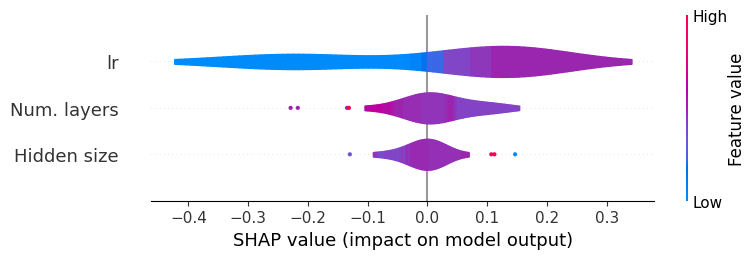

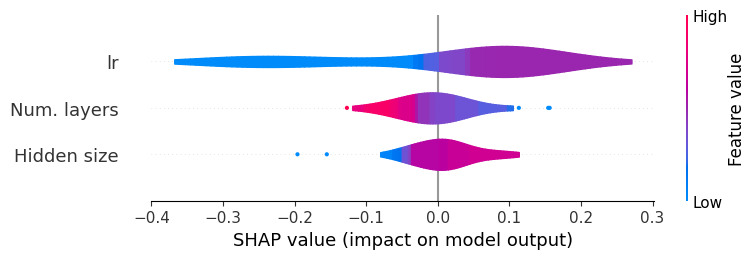

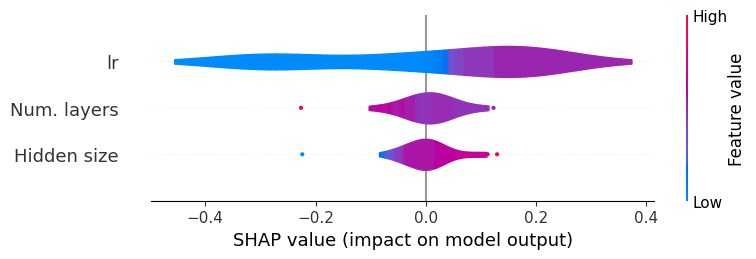

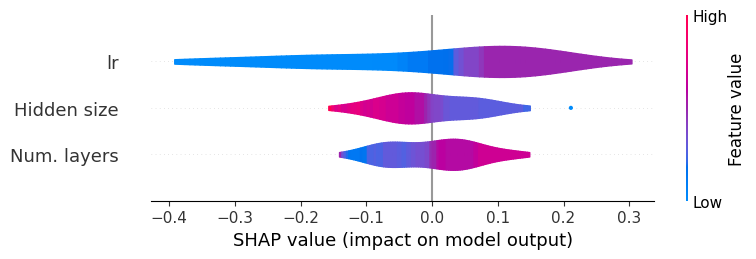

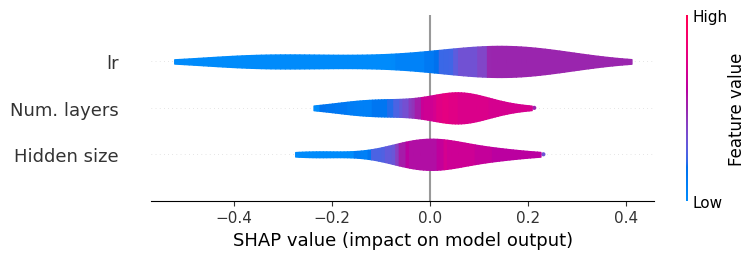

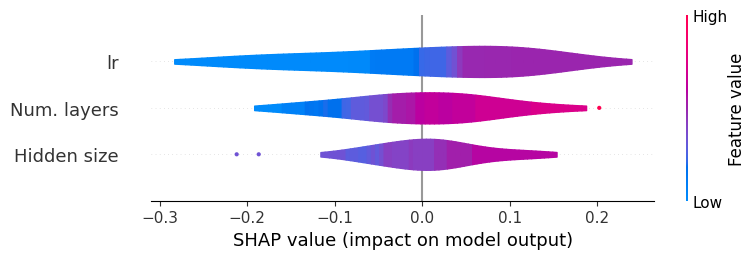

In [32]:
get_GCN_shap_summary_plot(result_GNN=result_GNN, dataset="Cora")
get_GCN_shap_summary_plot(result_GNN=result_GNN, dataset="Citeseer")
get_GCN_shap_summary_plot(result_GNN=result_GNN, dataset="Pubmed")
get_GCN_shap_summary_plot(result_GNN=result_GNN, dataset="Cornell")
get_GCN_shap_summary_plot(result_GNN=result_GNN, dataset="Texas")
get_GCN_shap_summary_plot(result_GNN=result_GNN, dataset="Wisconsin")

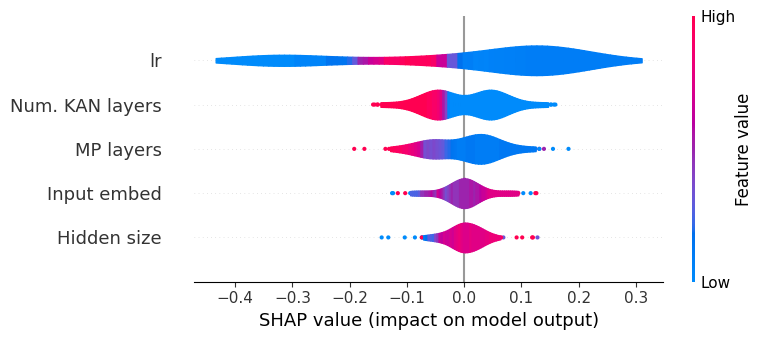

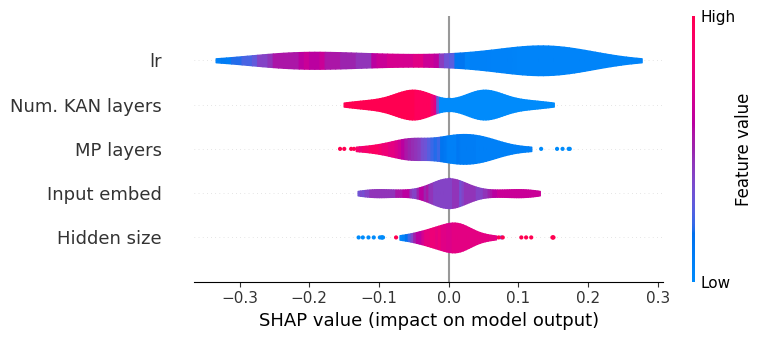

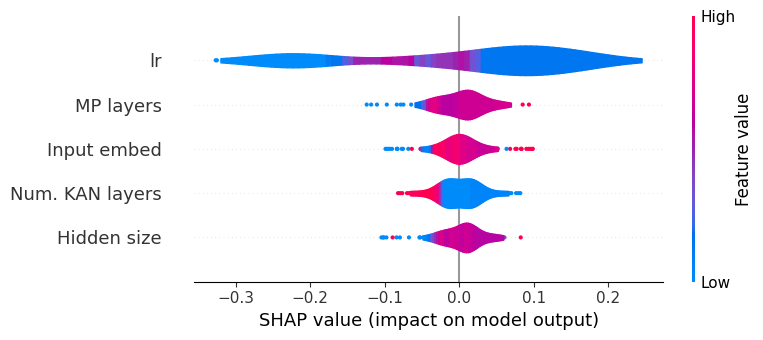

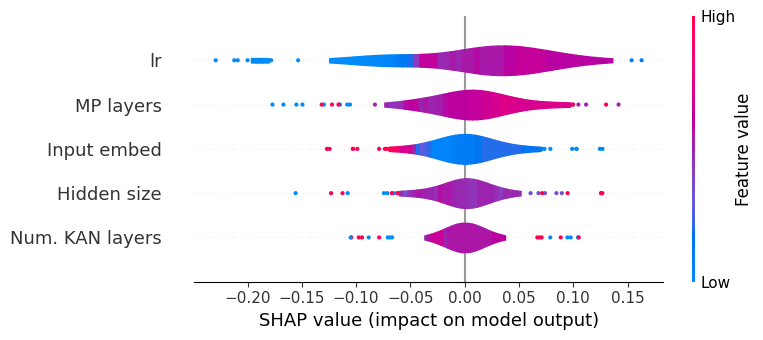

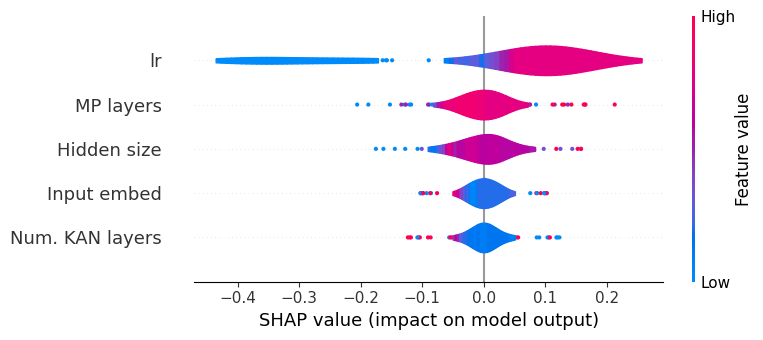

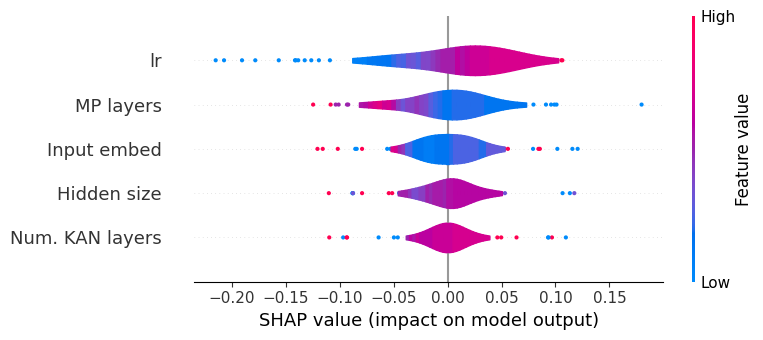

In [33]:
get_KANGNN_shap_summary_plot(result_KANGNN=result_KANGNN, dataset="Cora")
get_KANGNN_shap_summary_plot(result_KANGNN=result_KANGNN, dataset="Citeseer")
get_KANGNN_shap_summary_plot(result_KANGNN=result_KANGNN, dataset="Pubmed")
get_KANGNN_shap_summary_plot(result_KANGNN=result_KANGNN, dataset="Cornell")
get_KANGNN_shap_summary_plot(result_KANGNN=result_KANGNN, dataset="Texas")
get_KANGNN_shap_summary_plot(result_KANGNN=result_KANGNN, dataset="Wisconsin")

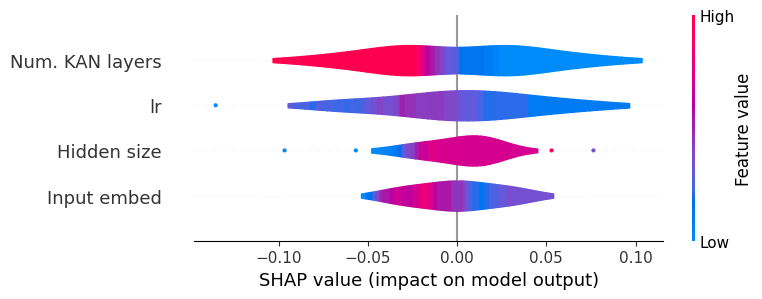

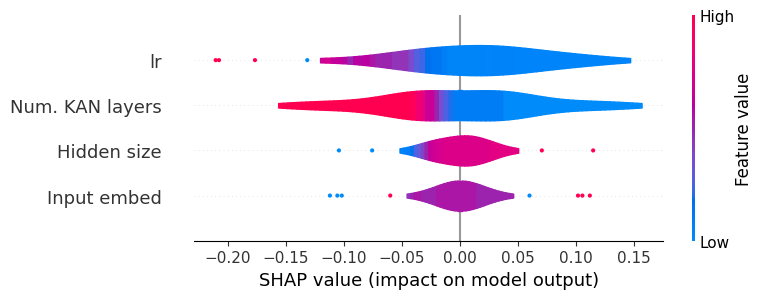

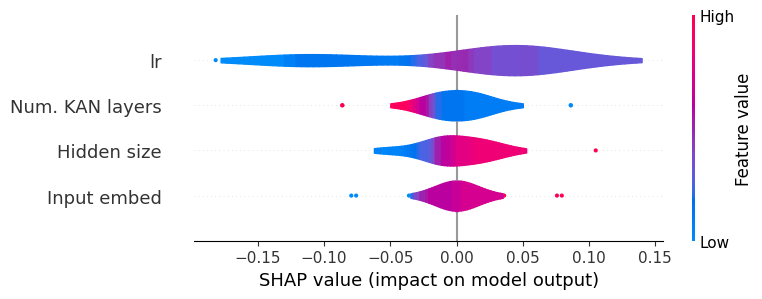

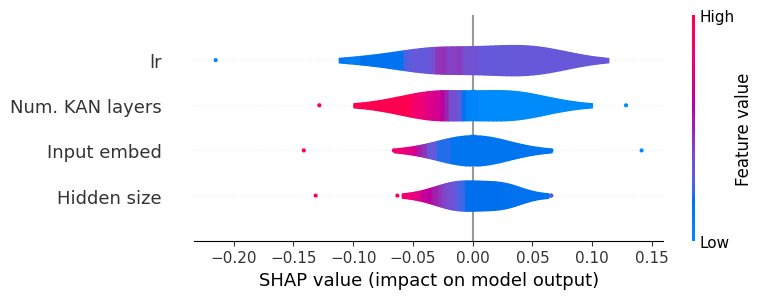

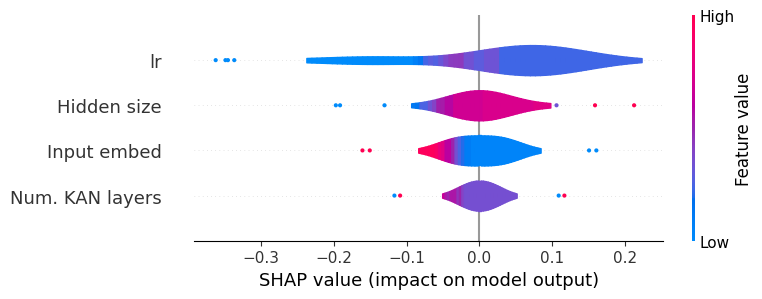

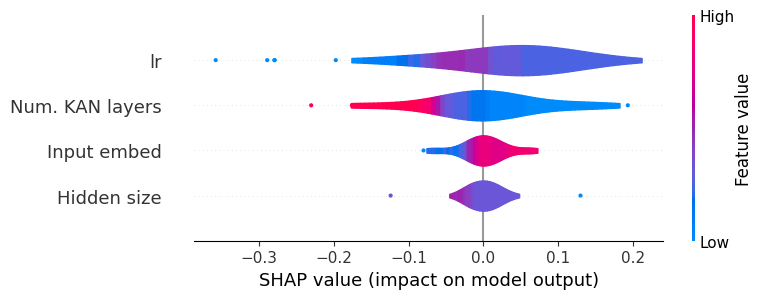

In [34]:
get_KAN_shap_summary_plot(result_KAN=result_KAN, dataset="Cora")
get_KAN_shap_summary_plot(result_KAN=result_KAN, dataset="Citeseer")
get_KAN_shap_summary_plot(result_KAN=result_KAN, dataset="Pubmed")
get_KAN_shap_summary_plot(result_KAN=result_KAN, dataset="Cornell")
get_KAN_shap_summary_plot(result_KAN=result_KAN, dataset="Texas")
get_KAN_shap_summary_plot(result_KAN=result_KAN, dataset="Wisconsin")

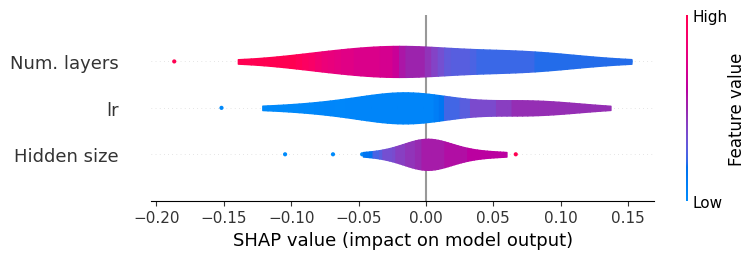

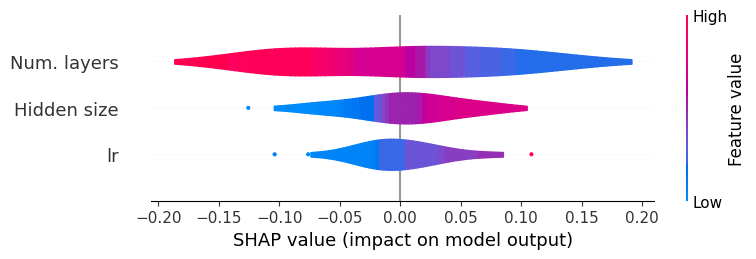

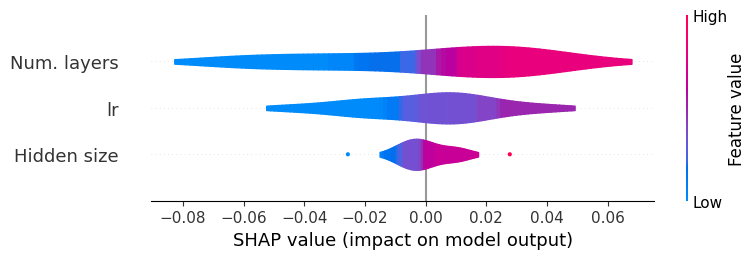

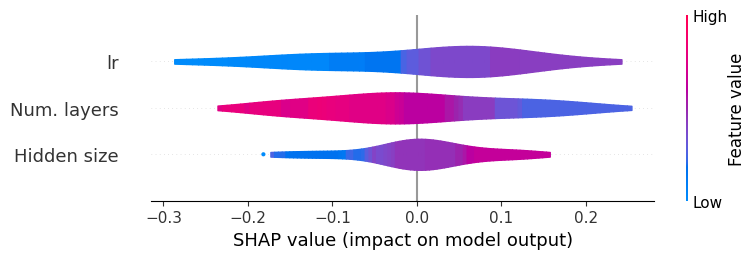

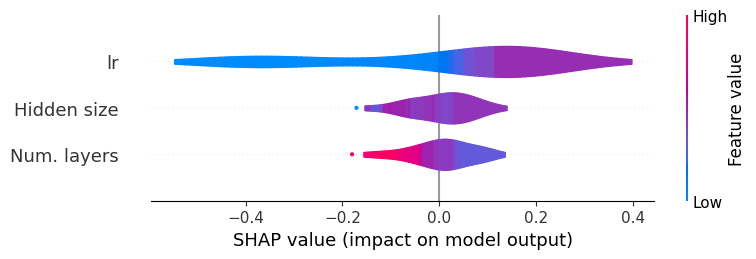

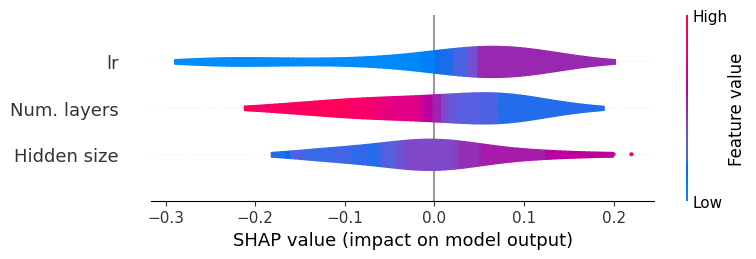

In [16]:
get_MLP_shap_summary_plot(result_MLP=result_MLP, dataset="Cora")
get_MLP_shap_summary_plot(result_MLP=result_MLP, dataset="Citeseer")
get_MLP_shap_summary_plot(result_MLP=result_MLP, dataset="Pubmed")
get_MLP_shap_summary_plot(result_MLP=result_MLP, dataset="Cornell")
get_MLP_shap_summary_plot(result_MLP=result_MLP, dataset="Texas")
get_MLP_shap_summary_plot(result_MLP=result_MLP, dataset="Wisconsin")

In [38]:
def plot_parameter_efficiency(
    result_GNN,
    result_KANGNN,
    result_KAN,
    result_MLP,
    dataset,
    input_embed_only: bool = False,
):
    num_parameters_GNN = []
    test_accuracy_GNN = []

    for hidden_size, hidden_size_results in result_GNN[dataset]["GCN"].items():
        for num_layers, num_layers_results in hidden_size_results.items():
            for lr, results in num_layers_results.items():
                num_parameters_GNN.append(results["Num. parameters"])
                test_accuracy_GNN.append(results["Test accuracy"])

    num_parameters_KANGNN = []
    test_accuracy_KANGNN = []

    for hidden_size, hidden_size_results in result_KANGNN[dataset]["KANGNN"].items():
        for num_layers, num_layers_results in hidden_size_results.items():
            for mp_layers, mp_layers_results in num_layers_results.items():
                for input_embed, input_embed_results in mp_layers_results.items():
                    if input_embed_only:
                        if input_embed:
                            for lr, results in input_embed_results.items():
                                num_parameters_KANGNN.append(results["Num. parameters"])
                                test_accuracy_KANGNN.append(results["Test accuracy"])
                    else:
                        for lr, results in input_embed_results.items():
                            num_parameters_KANGNN.append(results["Num. parameters"])
                            test_accuracy_KANGNN.append(results["Test accuracy"])
                    # for lr, results in input_embed_results.items():
                    #     num_parameters_KANGNN.append(results["Num. parameters"])
                    #     test_accuracy_KANGNN.append(results["Test accuracy"])

    num_parameters_KAN = []
    test_accuracy_KAN = []

    for hidden_size, hidden_size_results in result_KAN[dataset]["KAN"].items():
        for num_layers, num_layers_results in hidden_size_results.items():
            for input_embed, input_embed_results in num_layers_results.items():
                if input_embed_only:
                    if input_embed:
                        for lr, results in input_embed_results.items():
                            num_parameters_KAN.append(results["Num. parameters"])
                            test_accuracy_KAN.append(results["Test accuracy"])
                else:
                    for lr, results in input_embed_results.items():
                        num_parameters_KAN.append(results["Num. parameters"])
                        test_accuracy_KAN.append(results["Test accuracy"])
    
    num_parameters_MLP = []
    test_accuracy_MLP = []
    
    for hidden_size, hidden_size_results in result_MLP[dataset]["MLP"].items():
        for num_layers, num_layers_results in hidden_size_results.items():
            for lr, results in num_layers_results.items():
                num_parameters_MLP.append(results["Num. parameters"])
                test_accuracy_MLP.append(results["Test accuracy"])

    # Get the unique values of the number of parameters
    unique_num_parameters_GNN = list(set(num_parameters_GNN))
    unique_num_parameters_KANGNN = list(set(num_parameters_KANGNN))
    unique_num_parameters_KAN = list(set(num_parameters_KAN))
    unique_num_parameters_MLP = list(set(num_parameters_MLP))

    plt.figure(figsize=(6, 6), dpi=100)
    """
    Plot the test accuracy for each unique number of parameters,
    set the alpha value to be 1 for the highest test accuracy point,
    and decrease the alpha value for the other points
    """
    for num_parameters in unique_num_parameters_GNN:
        indices = [i for i, x in enumerate(num_parameters_GNN) if x == num_parameters]
        test_accuracies = [test_accuracy_GNN[i] for i in indices]
        max_test_accuracy = max(test_accuracies)
        for test_accuracy in test_accuracies:
            if test_accuracy == max_test_accuracy:
                plt.scatter(
                    num_parameters,
                    test_accuracy,
                    color="orangered",
                    alpha=1,
                )
            else:
                plt.scatter(
                    num_parameters,
                    test_accuracy,
                    color="orangered",
                    alpha=0.1 * (test_accuracy / max_test_accuracy),
                )
    for num_parameters in unique_num_parameters_KANGNN:
        indices = [
            i for i, x in enumerate(num_parameters_KANGNN) if x == num_parameters
        ]
        test_accuracies = [test_accuracy_KANGNN[i] for i in indices]
        max_test_accuracy = max(test_accuracies)
        for test_accuracy in test_accuracies:
            if test_accuracy == max_test_accuracy:
                plt.scatter(num_parameters, test_accuracy, color="darkviolet", alpha=1)
            else:
                plt.scatter(
                    num_parameters,
                    test_accuracy,
                    color="darkviolet",
                    alpha=0.1 * (test_accuracy / max_test_accuracy),
                )
    for num_parameters in unique_num_parameters_KAN:
        indices = [i for i, x in enumerate(num_parameters_KAN) if x == num_parameters]
        test_accuracies = [test_accuracy_KAN[i] for i in indices]
        max_test_accuracy = max(test_accuracies)
        for test_accuracy in test_accuracies:
            if test_accuracy == max_test_accuracy:
                plt.scatter(
                    num_parameters,
                    test_accuracy,
                    color="dodgerblue",
                    alpha=1,
                )
            else:
                plt.scatter(
                    num_parameters,
                    test_accuracy,
                    color="dodgerblue",
                    alpha=0.1 * (test_accuracy / max_test_accuracy),
                )
    for num_parameters in unique_num_parameters_MLP:
        indices = [i for i, x in enumerate(num_parameters_MLP) if x == num_parameters]
        test_accuracies = [test_accuracy_MLP[i] for i in indices]
        max_test_accuracy = max(test_accuracies)
        for test_accuracy in test_accuracies:
            if test_accuracy == max_test_accuracy:
                plt.scatter(
                    num_parameters,
                    test_accuracy,
                    color="limegreen",
                    alpha=1,
                )
            else:
                plt.scatter(
                    num_parameters,
                    test_accuracy,
                    color="limegreen",
                    alpha=0.1 * (test_accuracy / max_test_accuracy),
                )

    plt.xticks(rotation=45)
    plt.xscale("log")
    plt.xlabel("Number of parameters")
    plt.ylabel("Test accuracy")
    plt.ylim(0, 1)
    plt.title(f"Parameter efficiency, {dataset} dataset")
    plt.scatter([], [], color="orangered", label="GNN")
    plt.scatter([], [], color="darkviolet", label="KAN + GNN")
    plt.scatter([], [], color="dodgerblue", label="KAN")
    plt.scatter([], [], color="limegreen", label="MLP")
    plt.legend(loc="lower right")
    plt.show()

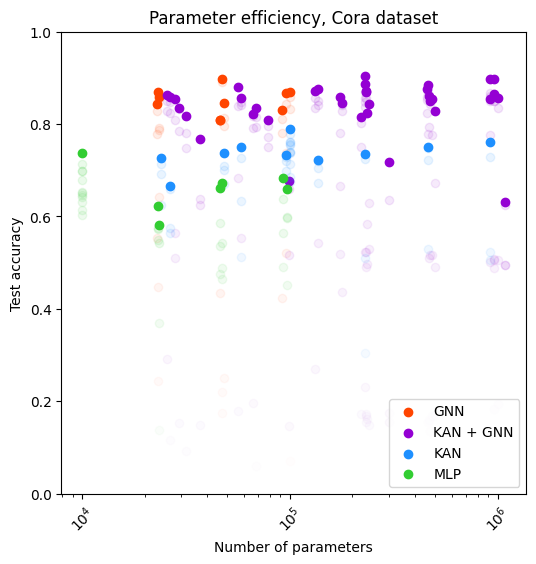

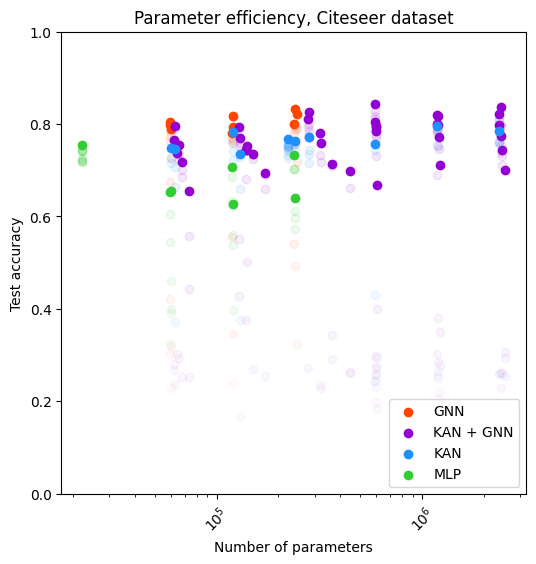

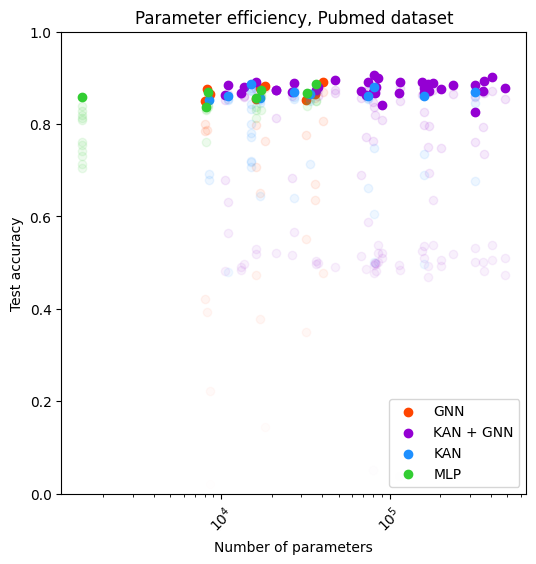

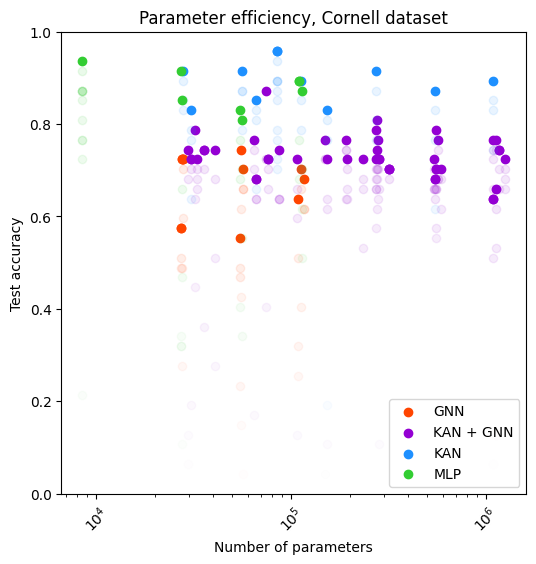

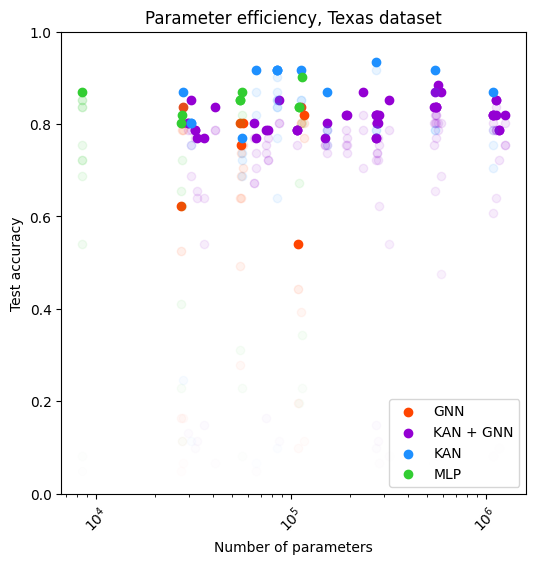

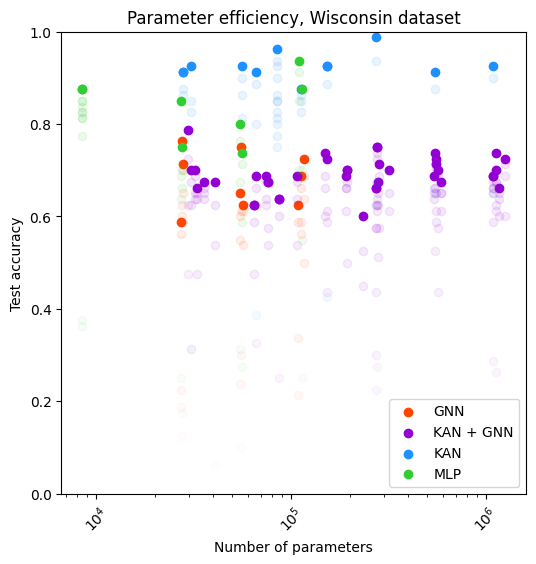

In [41]:
plot_parameter_efficiency(
    result_GNN=result_GNN,
    result_KANGNN=result_KANGNN,
    result_KAN=result_KAN,
    result_MLP=result_MLP,
    dataset="Cora",
)
plot_parameter_efficiency(
    result_GNN=result_GNN,
    result_KANGNN=result_KANGNN,
    result_KAN=result_KAN,
    result_MLP=result_MLP,
    dataset="Citeseer",
)
plot_parameter_efficiency(
    result_GNN=result_GNN,
    result_KANGNN=result_KANGNN,
    result_KAN=result_KAN,
    result_MLP=result_MLP,
    dataset="Pubmed",
)
plot_parameter_efficiency(
    result_GNN=result_GNN,
    result_KANGNN=result_KANGNN,
    result_KAN=result_KAN,
    result_MLP=result_MLP,
    dataset="Cornell",
)
plot_parameter_efficiency(
    result_GNN=result_GNN,
    result_KANGNN=result_KANGNN,
    result_KAN=result_KAN,
    result_MLP=result_MLP,
    dataset="Texas",
)
plot_parameter_efficiency(
    result_GNN=result_GNN,
    result_KANGNN=result_KANGNN,
    result_KAN=result_KAN,
    result_MLP=result_MLP,
    dataset="Wisconsin",
)

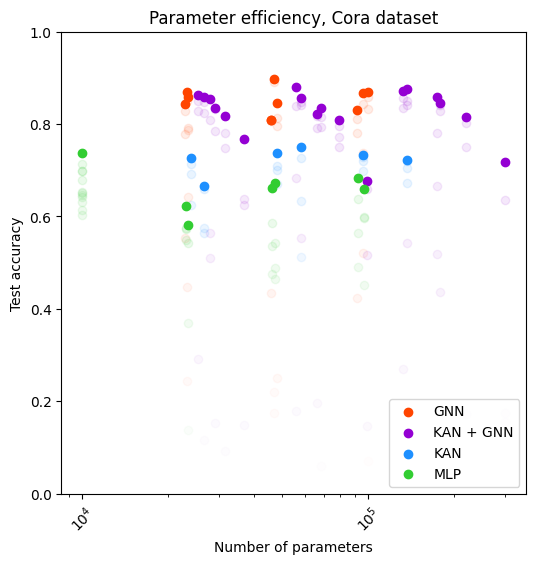

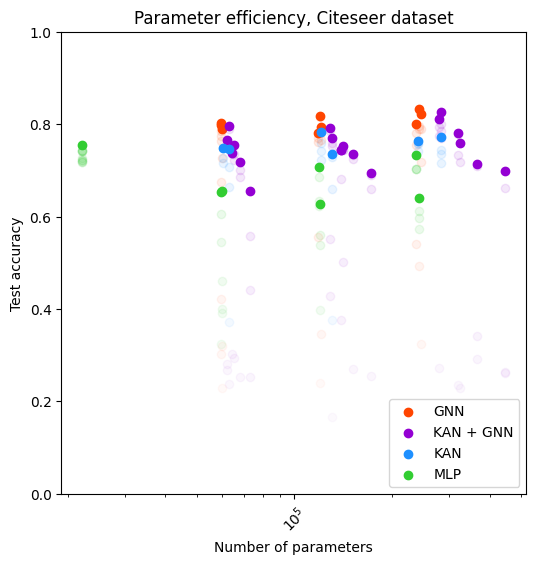

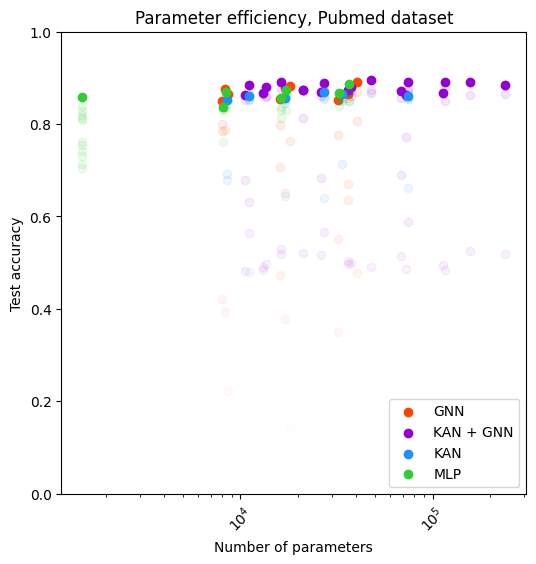

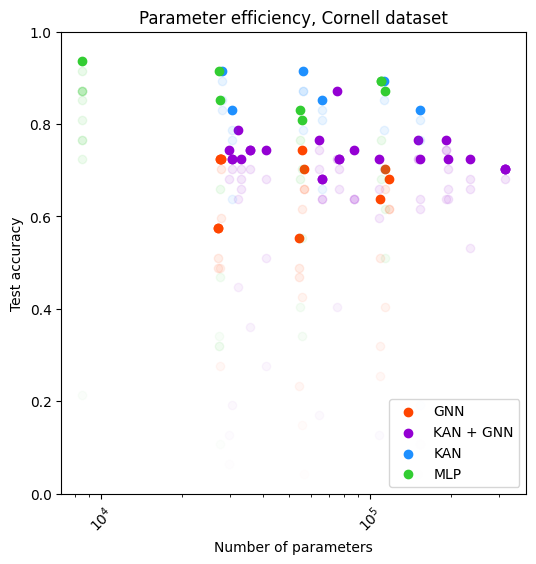

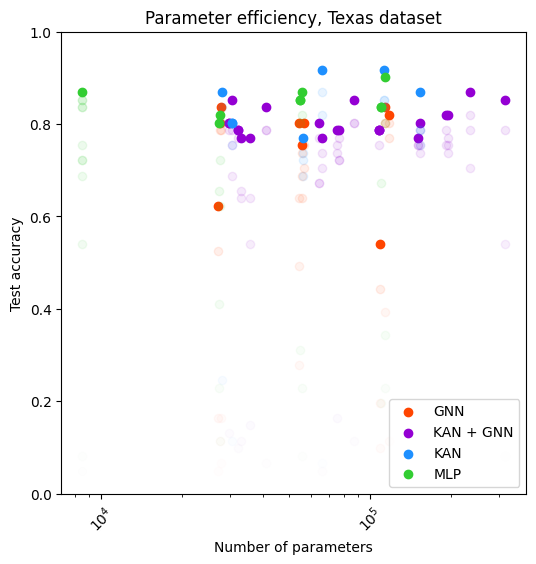

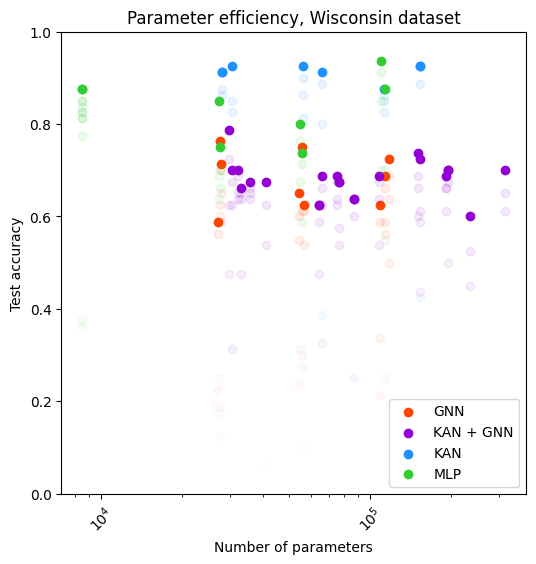

In [42]:
plot_parameter_efficiency(
    result_GNN=result_GNN,
    result_KANGNN=result_KANGNN,
    result_KAN=result_KAN,
    result_MLP=result_MLP,
    dataset="Cora",
    input_embed_only=True,
)
plot_parameter_efficiency(
    result_GNN=result_GNN,
    result_KANGNN=result_KANGNN,
    result_KAN=result_KAN,
    result_MLP=result_MLP,
    dataset="Citeseer",
    input_embed_only=True,
)
plot_parameter_efficiency(
    result_GNN=result_GNN,
    result_KANGNN=result_KANGNN,
    result_KAN=result_KAN,
    result_MLP=result_MLP,
    dataset="Pubmed",
    input_embed_only=True,
)
plot_parameter_efficiency(
    result_GNN=result_GNN,
    result_KANGNN=result_KANGNN,
    result_KAN=result_KAN,
    result_MLP=result_MLP,
    dataset="Cornell",
    input_embed_only=True,
)
plot_parameter_efficiency(
    result_GNN=result_GNN,
    result_KANGNN=result_KANGNN,
    result_KAN=result_KAN,
    result_MLP=result_MLP,
    dataset="Texas",
    input_embed_only=True,
)
plot_parameter_efficiency(
    result_GNN=result_GNN,
    result_KANGNN=result_KANGNN,
    result_KAN=result_KAN,
    result_MLP=result_MLP,
    dataset="Wisconsin",
    input_embed_only=True,
)